# Setting Up - Install Packages in the Workspace
Before you move on to the project instruction, follow the cells below to ensure you have the necessary packages installed. 
The cells below will also educate you on installing newer pinned packages, should you need them in the future. 

In [1]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [2]:
# Step 2. Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 
print('')

In [3]:
# Install the pinned version of packages, similar to below or use requirements.txt

!python -m pip install 'numpy==1.19.5' 'prompt-toolkit<2.0.0,>=1.0.15' 'jupyter-client>=7.0.0' 'jsonschema>=3.0.1' 'widgetsnbextension==3.0.0'


    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 23.3MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 18.3MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 20.9MB/s ta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0
  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Found existing installation: widgetsnbextension 3.1.0
    Uninstalling widgetsnbextension-3.1.0:
      Successfully uni

In [4]:
# Check the version of any specific package
!python -m pip freeze | grep numpy

numpy==1.19.5


# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [5]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

### 2. Importing the required packages 

in order to run the code we will load both external and local packages

The local packages are python files with classes for the Unity Environment, and agents

In [6]:
from datetime import datetime
import json
import os
import matplotlib.pyplot as plt
import copy

from rl_environment import RLEnvironment
from base_agent import BaseAgent
from dqn_agent import DQNAgent
from double_dqn_agent import DoubleDQNAgent

### 3. Preparing the environment
Next we set up the hyperparameters for the environment and agent

In [7]:
agents = {"base": BaseAgent, "random": BaseAgent, "dqn": DQNAgent, "double_dqn": DoubleDQNAgent}

configuration = {
                "max_episodes" : 2000,
                "max_time" : 300, 
                "eps_start" : 1.0,
                "eps_end" : 0.01,
                "eps_decay" : 0.990,
                "target_score" : 14.0,
                "agent" : {
                        "type" : "double_dqn",
                        "buffer_size" : int(1e5),  # replay buffer size
                        "batch_size" : 128,         # minibatch size
                        "gamma" : 0.99,            # discount factor
                        "tau" : 1e-3,              # for soft update of target parameters
                        "lr" : 5e-4,               # learning rate 
                        "update_every" : 4,        # how often to update the network
                        "network" :{"hidden_layers": [64,64]} #amount and size of hidden layers
                }
}

Next, we will start the environment!  **_Before running the code cell below_**, download the required files. If you are running this from the Udacity Jupyter environment it is already installed in `"/data/Banana_Linux_NoVis/Banana.x86_64"`


- [Linux](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
- [Mac OSX](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
- [Windows (32-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)
- [Windows (64-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)


Afterwards change the `file_name` parameter to match the location of the Unity environment that you downloaded.


- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [8]:
env = RLEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
env.print_env_info()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 4. Start training the agent and save the results
We can now start training the agent. After setting up the start_date and name which we will use when saving the results we will create an agent based on the configuration

Afterwards, we will send the agent and the configuration of the training to the environment. This can take quite some time, 

In [9]:
# setting up the variables start_date and name
start_date = datetime.now()
name = configuration["agent"]["type"] + "_" + start_date.strftime("%Y%m%d_%H%M%S")


# create an agent based on the configuration
agent = agents[configuration["agent"]["type"]](state_size=37, action_size=4, seed=0, agent_configuration = configuration["agent"])

# run the training
scores = env.train(agent, configuration["max_episodes"], configuration["max_time"], 
                configuration["eps_start"], configuration["eps_end"], configuration["eps_decay"],
                configuration["target_score"],)

# save the end_date and duration of the whole training
end_date = datetime.now()
duration = end_date - start_date

# after the training we want to save the model of the agent to a folder
#create an 'output' folder if it does not exist
if not os.path.exists("output"):
    os.makedirs("output")
# create the path to which the agent outputs the model
model_path = 'output/model_' + name + '.pt'
agent.save(path=model_path)

Episode 100	Average Score: 1.64
Episode 200	Average Score: 7.00
Episode 300	Average Score: 10.20
Episode 400	Average Score: 12.29
Episode 456	Average Score: 14.02
Environment solved in 456 episodes!	Average Score: 14.02


In [10]:
cur_result = {"name": name, "type":configuration["agent"]["type"],
                "date": start_date.strftime("%Y-%m-%d %H:%M:%S"), "episodes" : len(scores),
                "final_score" :  sum(scores[-100:])/len(scores[-100:]), "duration" : str(duration),
                "scores": scores, "configuration": configuration, "model_path" : model_path}

# save the result of the current run
result_path = "output/results_"+ name + ".json"
with open(result_path, 'w') as f:
    json.dump(cur_result, f, indent=2) 

# open all previous results
if os.path.isfile("output/results.json"):
    with open("output/results.json", 'r') as f:
        results = json.load(f)
# if it does not exist create an empty array
else:
    results = []

# save results with the current result appended
results.append(cur_result)
with open("output/results.json", 'w') as f:
    json.dump(results, f, indent=2)

View the results and compare then with the 5 most recent results. The graph displays the moving average score of the last 100 episodes of each agent

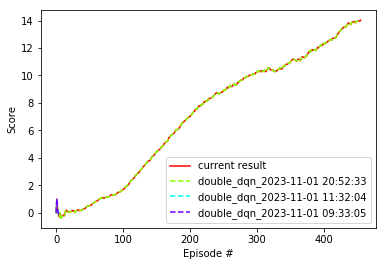

In [11]:
%matplotlib inline

# plot the results and compare them with other results
def calculate_moving_average(numbers, window_size):
    return [round(sum(numbers[max(0,i-window_size):i]) / 
                  min(i,window_size),
                  2)
            for i in range(1, len(numbers)+1)]

plt.plot(calculate_moving_average(scores,100), color='red', label='current result')

#filter the results on the 5 best final score (highest average of last 100 episodes) 
results_displayed = sorted(results, key=lambda r: r['date'], reverse=True)[:6][-5:]
cmap = plt.cm.get_cmap('hsv', len(results_displayed)+2)
#plot these results by taking all the scores and calculating the moving average.
for i, result in enumerate(results_displayed):
    label = result['type'] + '_' + result['date'] if result.get('alias') is None else result['alias']
    plt.plot(calculate_moving_average(result['scores'],100), color=cmap(i+1), alpha=1.0, linestyle='--', label=label)
plt.legend()
plt.ylabel("Score")
plt.xlabel("Episode #")
plt.show()

### 5. play an episode and print the achieved score

we can now run an episode in real time. If you are running on a headless compute (such as Udacity environment) you will unfortunately not see the agent 

In [12]:
if os.path.isfile(result_path):
        with open(result_path, 'r') as f:
                result = json.load(f)

configuration = result['configuration']
model_path = result['model_path']

agent = agents[configuration["agent"]["type"]](state_size=37, action_size=4, seed=0, agent_configuration = configuration["agent"])
agent.load(model_path)
score = env.run_episode(agent)
print(score)

18.0


In [13]:
env.close()